<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaJWG7PzF3toxaRMB1-JicpqMgJuEXATd0fg&" style="width: 180px;margin-top:50px;margin-bottom:50px;" align="left">
   <div style= "font-size: 28px;font-weight:bold;margin-top:20px;margin-bottom:20px;margin-left:360px;margin-right:140px; line-height: 1.1;color:#6f800f;"><center>Data Mining Project | ABCDEats Inc.</center></div>
   <div style= "font-size: 17px;font-weight:bold;"><center>Fall Semester | 2024 - 2025</center></div>
   <div><center><b>Master in Data Science and Advanced Analytics</b> </center></div>
 <br>
    <div><center>André Silvestre, 20240502 </center></div>
    <div><center>Filipa Pereira, 20240509 </center></div>
    <div><center>Umeima Mahomed, 20240543 </center></div>
    <br>
    <div><center><b>Group 37</b></center></div>
 <br>

<div style="background: linear-gradient(to right,#6f800f, #6f800f); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## Introduction

The purpose of this project is to analyze the data of **ABCDEats Inc.**, ....


## Data Description

Each row corresponds to one customer, and the column descriptions are given below:

|                                   Column Name                                   | Description                                                                                         |
|:-------------------------------------------------------------------------------:|:----------------------------------------------------------------------------------------------------|
|                                **`customer_id`**                                | Unique identifier for each customer.                                                                |
|                              **`customer_region`**                              | Geographic region where the customer is located.                                                    |
|                               **`customer_age`**                                | Age of the customer.                                                                                |
|                               **`vendor_count`**                                | Number of unique vendors the customer has ordered from.                                             |
|                               **`product_count`**                               | Total number of products the customer has ordered.                                                  |
|                                 **`is_chain`**                                  | Indicates whether the customer’s order was from a chain restaurant.                                 |
|                                **`first_order`**                                | Number of days from the start of the dataset when the customer first placed an order.               |
|                                **`last_order`**                                 | Number of days from the start of the dataset when the customer most recently placed an order.       |
|                                **`last_promo`**                                 | The category of the promotion or discount most recently used by the customer.                       |
|                              **`payment_method`**                               | Method most recently used by the customer to pay for their orders.                                  |
| **`CUI_American`**, **`CUI_Asian`**, **`CUI_Chinese`**, **`CUI_Italian`**, etc. | The amount in monetary units spent by the customer from the indicated type of cuisine.              |
|                           **`DOW_0`** to **`DOW_6`**                            | Number of orders placed on each day of the week (**`0`** = **Sunday**, **`6`** = **Saturday**).     |
|                            **`HR_0`** to **`HR_23`**                            | Number of orders placed during each hour of the day (**`0`** = **midnight**, **`23`** = **11 PM**). |

<div style="background: linear-gradient(to right,#6f800f, #6f800f); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## 📚 Libraries Import

In [123]:
# For data
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# For data preprocessing
from sklearn.model_selection import train_test_split

# For model evaluation

# For clustering


# Set the style of the visualization
pd.set_option('display.max_columns', None) # display all columns

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
plt.style.use('ggplot')
sns.set_theme(style='white')

# <a class='anchor' id='1'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#bEd62f, #6f800f); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>Part 1 | Exploratory Data Analysis</b></h1></center>
</div>

In [3]:
# Importing the dataset
ABCDEats = pd.read_csv('DM2425_ABCDEats_DATASET.csv')

In [4]:
# Display the first 5 rows
ABCDEats.head() 

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# Number of rows and columns
print('Number of\033[1m rows \033[0m:', ABCDEats.shape[0])
print('Number of\033[1m columns \033[0m:', ABCDEats.shape[1])

Number of rows : 31888
Number of columns : 56


In [12]:
# Check for missing values in the dataset (n = number of missing values & % = percentage of missing values)
pd.DataFrame({'n NAs': ABCDEats.isnull().sum(), 
              '% NAs': round(ABCDEats.isnull().mean() * 100,2)})

,n NAs,% NAs
customer_id,0,0.00
customer_region,0,0.00
customer_age,727,2.28
vendor_count,0,0.00
product_count,0,0.00
is_chain,0,0.00
first_order,106,0.33
last_order,0,0.00
last_promo,0,0.00
payment_method,0,0.00


In [13]:
# Check for duplicates rows by costumer_id
ABCDEats.duplicated().sum()
# ABCDEats.duplicated('customer_id').sum() # it is the same

13

In [14]:
# Drop duplicates
ABCDEats.drop_duplicates(inplace=True)

---

In [15]:
# Check the data types
ABCDEats.dtypes

customer_id                  object
customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                       

In [16]:
# Discritive statistics
round(ABCDEats.describe(), 2)

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31148.00,31875.00,31875.00,31875.00,31769.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,30711.0,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00
mean,27.51,3.10,5.67,2.82,28.47,63.67,4.88,9.96,2.30,0.80,0.77,1.43,0.88,0.95,1.63,3.23,3.00,0.71,3.00,3.91,0.84,0.56,0.57,0.59,0.62,0.68,0.65,0.70,0.0,0.05,0.06,0.12,0.10,0.08,0.07,0.08,0.13,0.23,0.33,0.38,0.31,0.24,0.22,0.28,0.36,0.39,0.34,0.25,0.14,0.07,0.05,0.05
std,7.16,2.77,6.96,3.98,24.10,23.23,11.65,23.56,8.48,6.43,3.66,8.19,5.26,5.83,7.44,11.25,10.18,4.54,9.77,15.55,4.43,1.01,1.04,1.05,1.07,1.09,1.07,1.17,0.0,0.32,0.35,0.50,0.44,0.36,0.33,0.38,0.64,0.73,0.89,0.96,0.84,0.64,0.60,0.74,0.87,0.94,0.89,0.80,0.59,0.35,0.30,0.28
min,15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,23.00,1.00,2.00,1.00,7.00,49.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,26.00,2.00,3.00,2.00,22.00,70.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,31.00,4.00,7.00,3.00,45.00,83.00,5.66,11.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,80.00,41.00,269.00,83.00,90.00,90.00,280.21,896.71,229.22,326.10,219.66,739.73,230.07,255.81,309.07,468.33,706.14,275.11,366.08,454.45,136.38,16.00,17.00,15.00,17.00,16.00,20.00,20.00,0.0,14.00,12.00,11.00,14.00,7.00,8.00,15.00,52.00,23.00,25.00,36.00,26.00,14.00,13.00,23.00,22.00,20.00,24.00,35.00,36.00,11.00,15.00,13.00


In [17]:
# Check the unique values of each column
for col in ABCDEats.columns[1:]:
    print(f'\033[1m{col}\033[0m[{ABCDEats[col].nunique()}]: {sorted(ABCDEats[col].unique())} \n')

customer_region[9]: ['-', '2360', '2440', '2490', '4140', '4660', '8370', '8550', '8670'] 

customer_age[66]: [15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 28.0, 29.0, 30.0, 31.0, 33.0, 38.0, nan, 27.0, 32.0, 34.0, 35.0, 36.0, 37.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0] 

vendor_count[37]: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 40, 41] 

product_count[93]: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 75, 76, 77, 79, 80, 81, 8

In [19]:
# With the unique values of each column, we can see that there are some columns with values represented by '-' 
# and some columns with values that are not in the domain of the column.

# Let's check the columns with values represented by '-' in the columns 'customer_region' and 'last_promo'
print(len(ABCDEats[ABCDEats['customer_region'] == '-'])) 
print(len(ABCDEats[ABCDEats['last_promo'] == '-'])) # last_promo '-' can be considered as don't have a promo

442
16744


In [21]:
# Check if first_order is before last_order
(ABCDEats['first_order'] > ABCDEats['last_order']).sum() # No rows with first_order > last_order 

0

In [23]:
# 

---

## 📊 Data Visualization

#### `customer_region`

#### `customer_age`

#### `vendor_count`

#### `product_count`

#### `is_chain`

#### `first_order`

#### `last_order`

#### `last_promo`

#### `payment_method`

In [25]:
# Unique values of the column 'payment_method'
ABCDEats['payment_method'].unique()

array(['DIGI', 'CASH', 'CARD'], dtype=object)

In [34]:
# Absolute and Relative Frequency Table of the column 'payment_method'
payment_method_n_freq = ABCDEats['payment_method'].value_counts().reset_index()
payment_method_n_freq.columns = ['payment_method', 'n']
payment_method_n_freq['%'] = round(payment_method_n_freq['n'] / ABCDEats.shape[0] * 100, 2)
payment_method_n_freq.set_index('payment_method', inplace=True)
pd.DataFrame(payment_method_n_freq.sort_values(by='n', ascending=False))

,n,%
payment_method,,
CARD,20153,63.23
DIGI,6098,19.13
CASH,5624,17.64


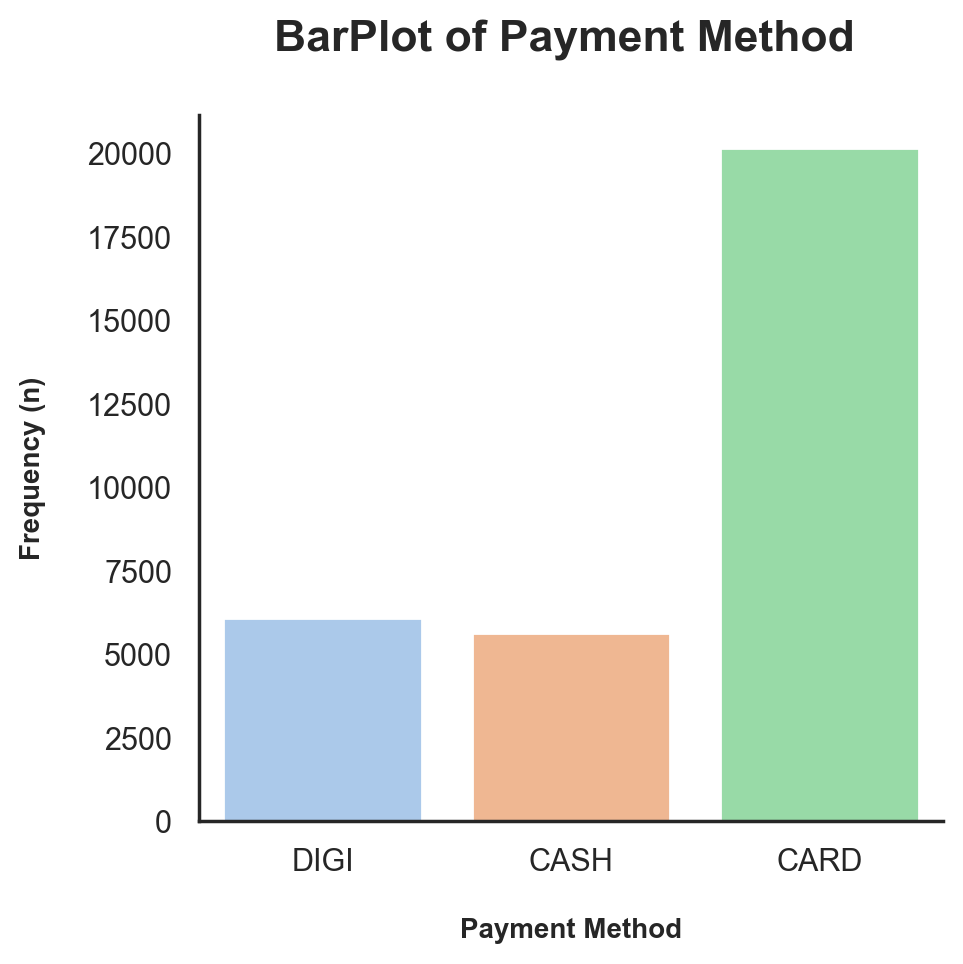

In [114]:
# Plot the absolute frequency of the column 'payment_method'
plt.figure(figsize=(5, 5))
sns.countplot(data=ABCDEats, x='payment_method', hue='payment_method', palette='pastel')
plt.title('BarPlot of Payment Method \n', fontweight='bold', fontsize=16)
plt.xlabel('\nPayment Method', fontweight='bold', fontsize=10)
plt.ylabel('Frequency (n)\n', fontweight='bold', fontsize=10)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

#### `CUI_American`, `CUI_Asian`, `CUI_Chinese`, `CUI_Italian`, etc.

In [43]:
# Unique values of the columns 'CUI_American', 'CUI_Asian', 'CUI_Chinese', 'CUI_Italian', etc.
cuisines = [col for col in ABCDEats.columns if 'CUI_' in col]
cuisines

['CUI_American',
 'CUI_Asian',
 'CUI_Beverages',
 'CUI_Cafe',
 'CUI_Chicken Dishes',
 'CUI_Chinese',
 'CUI_Desserts',
 'CUI_Healthy',
 'CUI_Indian',
 'CUI_Italian',
 'CUI_Japanese',
 'CUI_Noodle Dishes',
 'CUI_OTHER',
 'CUI_Street Food / Snacks',
 'CUI_Thai']

In [46]:
# Statistics of the columns 'CUI_American', 'CUI_Asian', 'CUI_Chinese', 'CUI_Italian', etc.
round(ABCDEats[cuisines].describe(), 2)

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai
count,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00,31875.00
mean,4.88,9.96,2.30,0.80,0.77,1.43,0.88,0.95,1.63,3.23,3.00,0.71,3.00,3.91,0.84
std,11.65,23.56,8.48,6.43,3.66,8.19,5.26,5.83,7.44,11.25,10.18,4.54,9.77,15.55,4.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,5.66,11.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,280.21,896.71,229.22,326.10,219.66,739.73,230.07,255.81,309.07,468.33,706.14,275.11,366.08,454.45,136.38


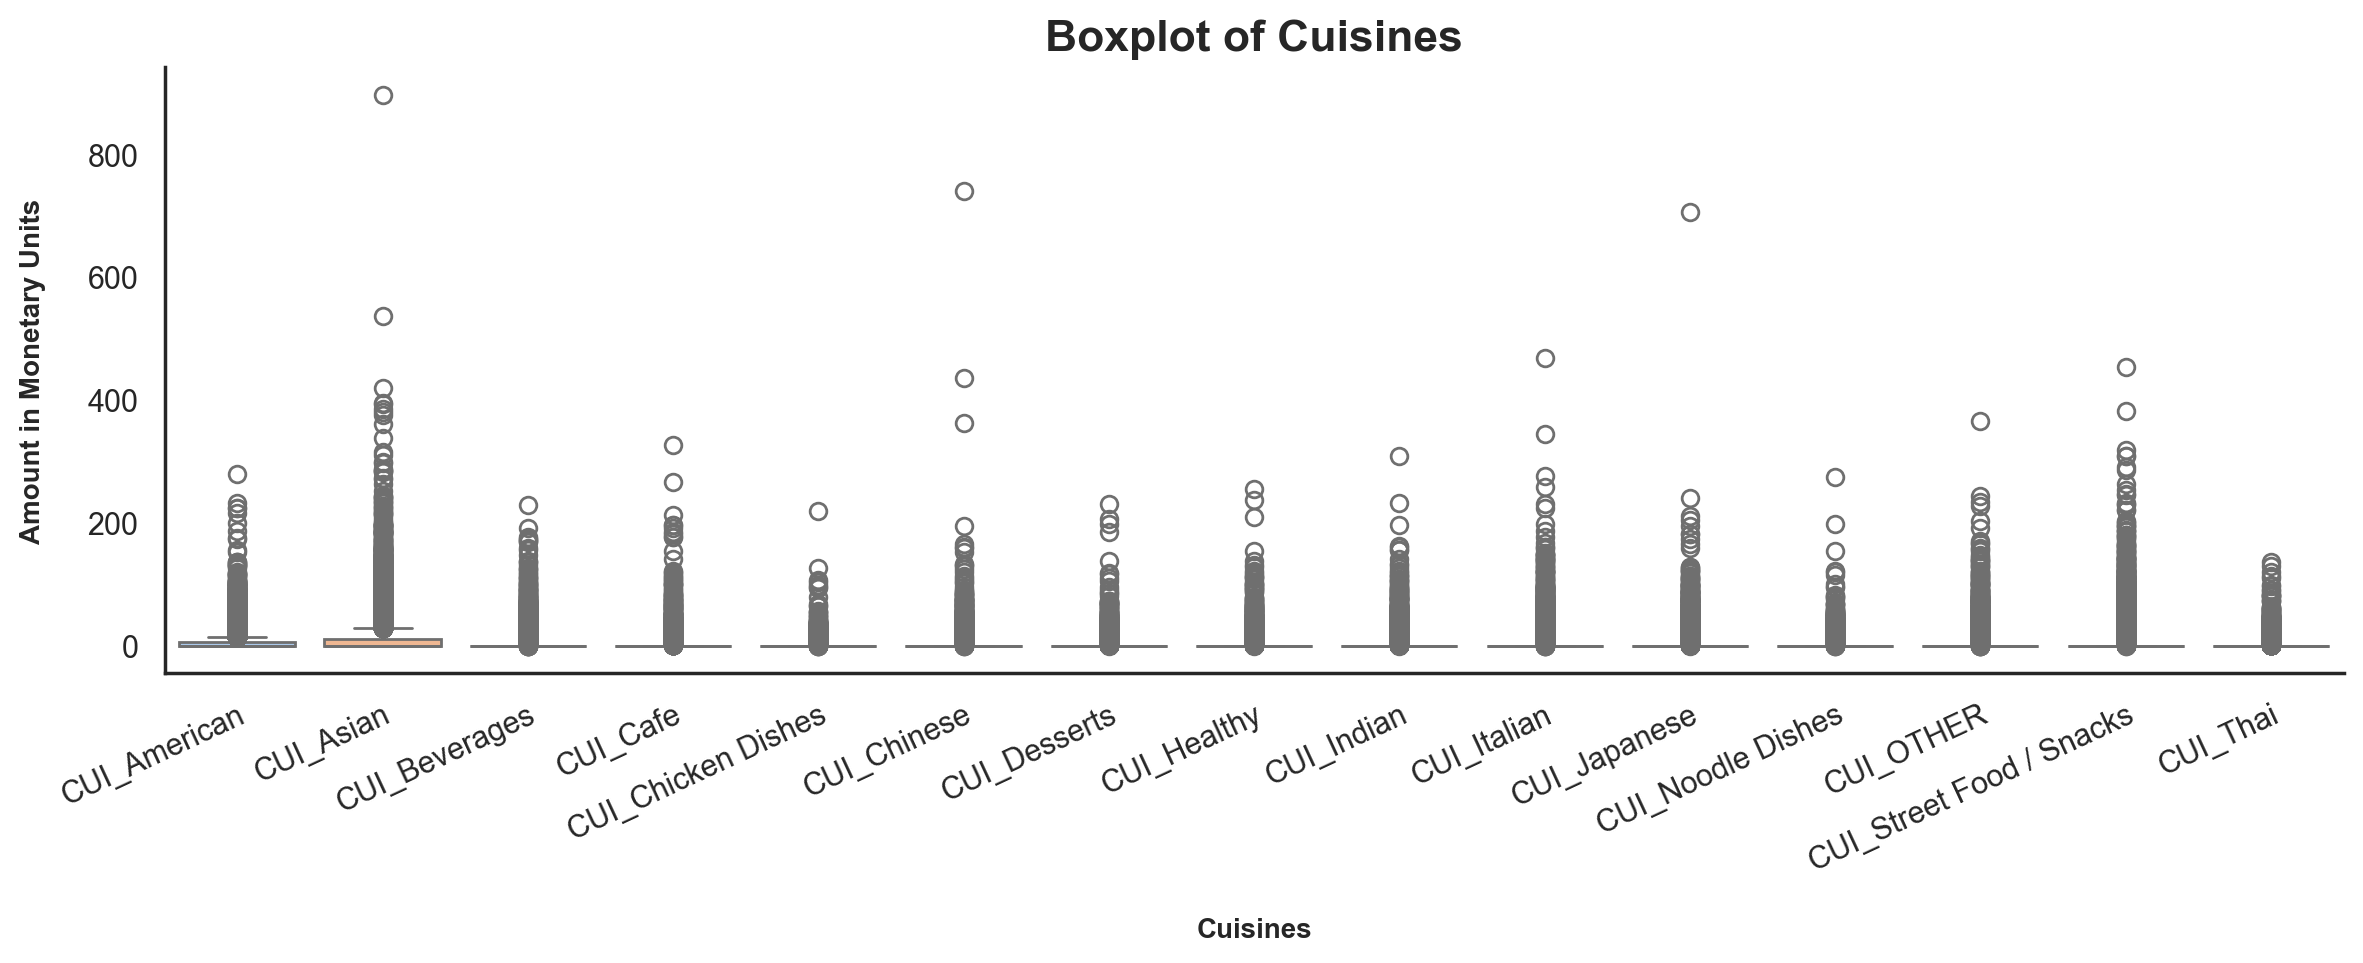

In [115]:
# Boxplot of the columns 'CUI_American', 'CUI_Asian', 'CUI_Chinese', 'CUI_Italian', etc.
plt.figure(figsize=(12, 5))
sns.boxplot(data=ABCDEats[cuisines], palette='pastel')
plt.title('Boxplot of Cuisines', fontweight='bold', fontsize=16)
plt.xlabel('\nCuisines', fontweight='bold', fontsize=10)
plt.ylabel('Amount in Monetary Units\n', fontweight='bold', fontsize=10)
plt.xticks(rotation=25, ha='right', rotation_mode='anchor')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

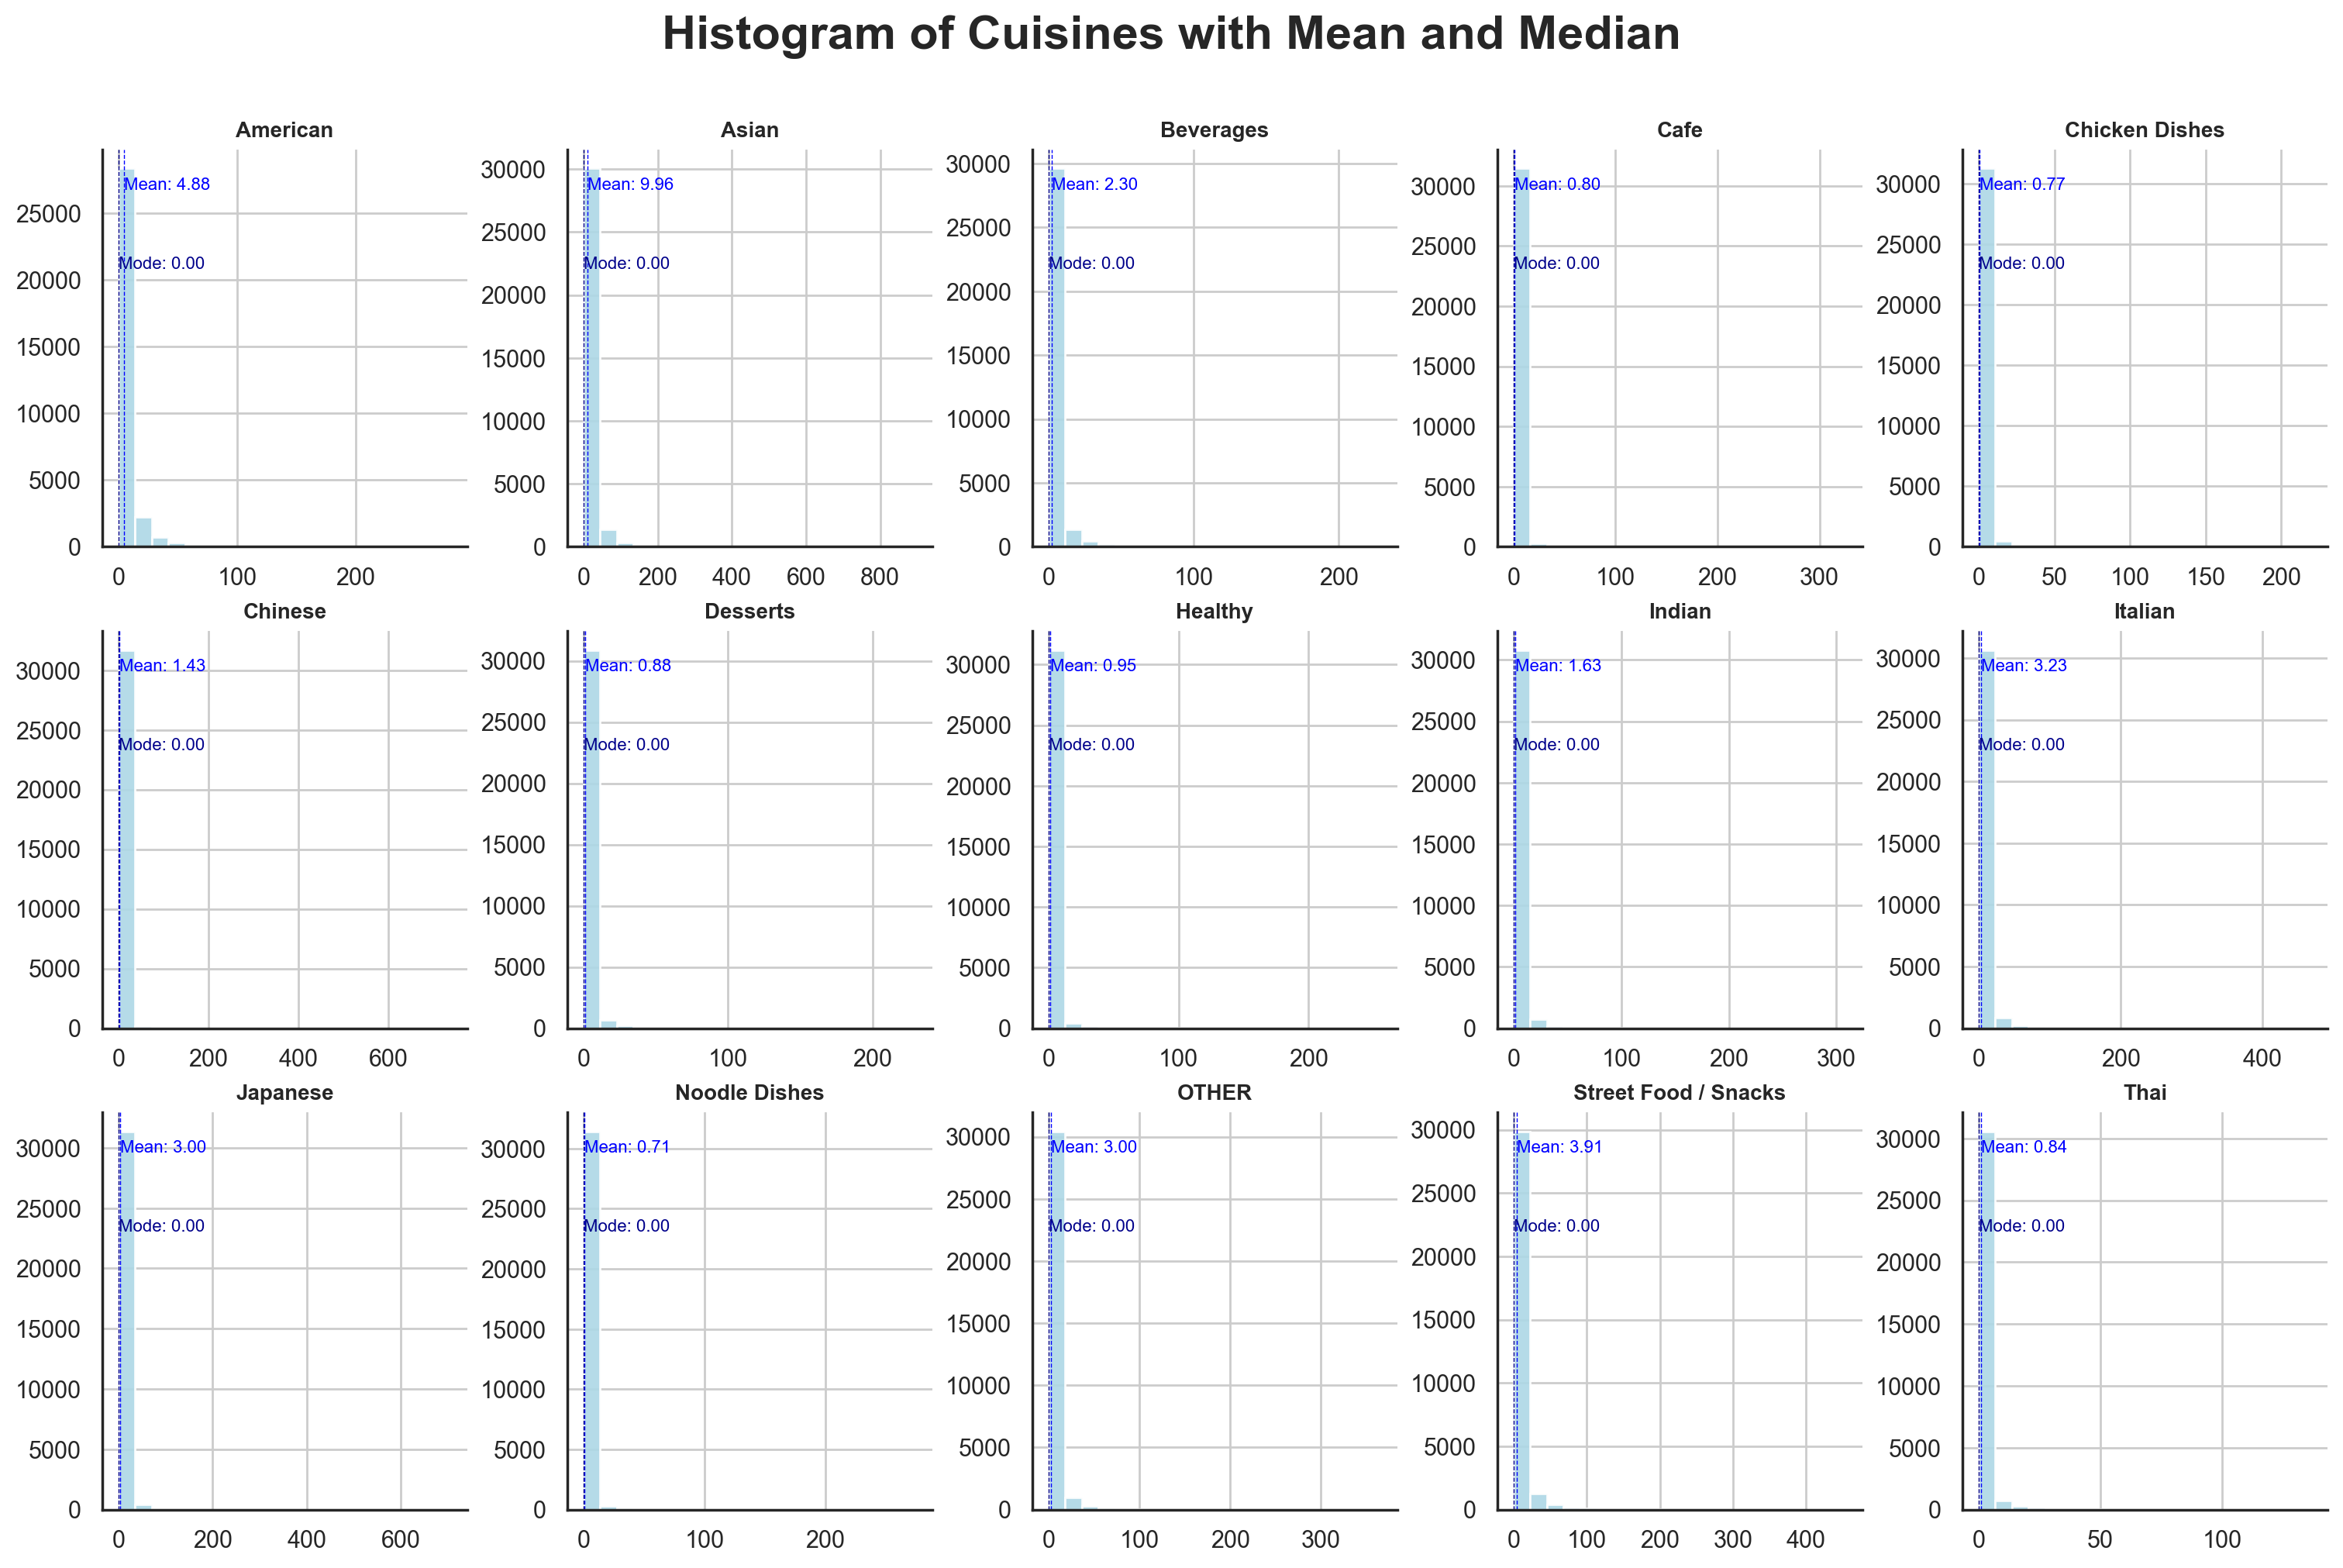

In [124]:
# Histogram with mean and mode lines for the columns 'CUI_American', 'CUI_Asian', 'CUI_Chinese', 'CUI_Italian', etc.
fig, axes = plt.subplots(nrows=3 , ncols=5, figsize=(15, 10), constrained_layout=True)

for i, col in enumerate(columns):
    ax = axes[int(i / 5), i % 5] if 3 > 1 else axes[i]
    ABCDEats[col].hist(bins=20, ax=ax, color='lightblue', alpha=0.9)
    
    # Calculate mean and median
    mean_val = ABCDEats[col].mean()
    median_val = ABCDEats[col].median()
    
    # Plot mean line
    ax.axvline(mean_val, color='blue', linestyle='dashed', linewidth=.5)
    ax.text(mean_val, ax.get_ylim()[1] * 0.9, f'Mean: {mean_val:.2f}', color='blue', fontsize=8)
    
    # Plot median line
    ax.axvline(median_val, color='darkblue', linestyle='dashed', linewidth=.5)
    ax.text(median_val, ax.get_ylim()[1] * 0.7, f'Mode: {median_val:.2f}', color='darkblue', fontsize=8)
    
    ax.set_title(col.replace('CUI_', ''), fontweight='bold', fontsize=10)

fig.suptitle('Histogram of Cuisines with Mean and Median\n', fontweight='bold', fontsize=22)
sns.despine(top=True, right=True)
plt.show()

> Maybe we can create a new column with the total amount spent by the customer in all types of cuisine and other with the most spent cuisine by the customer (possibly the most frequent cuisine that the customer orders).

In [125]:
# Create a new column with the total amount spent by the customer in all types of cuisine
ABCDEats['CUI_Total_Amount_Spent'] = ABCDEats[cuisines].sum(axis=1)
pd.DataFrame(ABCDEats['CUI_Total_Amount_Spent'].describe())

,CUI_Total_Amount_Spent
count,31875.000000
mean,38.295857
std,46.410657
min,0.000000
25%,12.880000
50%,24.140000
75%,44.970000
max,1418.330000


In [57]:
# Create a new column with the most spent cuisine by the customer
ABCDEats['CUI_Most_Spent_Cuisine'] = ABCDEats[cuisines].idxmax(axis=1).str.replace('CUI_', '')
CUI_Most_Spent_Cuisine = pd.DataFrame({
    'n': ABCDEats['CUI_Most_Spent_Cuisine'].value_counts(),
    '%': round(ABCDEats['CUI_Most_Spent_Cuisine'].value_counts() / ABCDEats.shape[0] * 100, 2)
}).sort_values(by='n', ascending=False)
CUI_Most_Spent_Cuisine.index.name = 'CUI_Most_Spent_Cuisine'
CUI_Most_Spent_Cuisine

,n,%
CUI_Most_Spent_Cuisine,,
Asian,7021,22.03
American,4308,13.52
OTHER,3134,9.83
Italian,3059,9.60
Japanese,2384,7.48
Street Food / Snacks,2289,7.18
Beverages,2058,6.46
Indian,1689,5.30
Chinese,1330,4.17


#### `DOW_0` to `DOW_6` & `HR_0` to `HR_23`

In [136]:
# Through these variables we can know what number of orders are placed in total by summing all the columns 'DOW_0' to 'DOW_6' or 'HR_0' to 'HR_23'
Total_Orders_DOW = ABCDEats.loc[:, 'DOW_0':'DOW_6'].sum().sum()
Total_Orders_DOW

139263

In [138]:
# Check if the sum of the columns 'HR_0' to 'HR_23' is equal to the total number of orders
Total_Orders_HR = ABCDEats.loc[:, 'HR_0':'HR_23'].sum().sum()
Total_Orders_HR

137711.0

In [140]:
# Difference between the sum of the columns 'HR_0' to 'HR_23' and the sum of the columns 'DOW_0' to 'DOW_6'
Total_Orders_HR - Total_Orders_DOW

-1552.0

In [143]:
# Check how many NA values are in the columns 'DOW_0' to 'DOW_6' and 'HR_0' to 'HR_23'
print(ABCDEats.loc[:, 'DOW_0':'DOW_6'].isnull().sum().sum())
print(ABCDEats.loc[:, 'HR_0':'HR_23'].isnull().sum().sum())

0
1164


> The sum of the columns 'HR_0' to 'HR_23' is not equal to the sum of the columns 'DOW_0' to 'DOW_6'. This is a problem of **data inconsistency**. 

In [150]:
# Table with the number of orders placed on each day of the week (DOW_0 to DOW_6) - rows - and each hour of the day (HR_0 to HR_23) - columns
DOW_HR = pd.DataFrame(index=range(7), columns=range(24))

for i in range(7):
    for j in range(24):
        DOW_HR.loc[i, j] = ABCDEats[(ABCDEats[f'DOW_{i}'] > 0) & (ABCDEats[f'HR_{j}'] > 0)].shape[0]

DOW_HR = DOW_HR.apply(pd.to_numeric)
DOW_HR.columns = [f'HR_{i}' for i in range(24)]
DOW_HR.index = [f'DOW_{i}' for i in range(7)]
DOW_HR

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0,703,764,1203,1128,993,880,1011,1595,2596,3444,3846,3346,2857,2675,2882,3274,3504,3163,2462,1627,953,640,614
1,0,637,712,1170,1106,961,865,990,1567,2602,3391,3771,3368,2895,2655,2889,3335,3602,3214,2489,1659,977,666,608
2,0,652,739,1169,1141,986,858,997,1630,2656,3540,3943,3470,2941,2709,3064,3513,3835,3345,2577,1655,963,696,653
3,0,675,727,1186,1097,1014,896,1036,1664,2699,3526,4027,3573,3027,2812,3284,3754,3997,3524,2696,1726,1005,657,631
4,0,663,784,1190,1100,975,896,1066,1738,2814,3681,4208,3696,3141,2973,3447,4104,4372,3907,2962,1864,1083,712,672
5,0,707,797,1137,1153,1021,916,1047,1631,2638,3480,4071,3584,3142,2866,3281,3868,4182,3754,2861,1805,1083,708,664
6,0,723,771,1107,1151,1021,896,1028,1669,2738,3632,4199,3794,3251,3033,3376,3918,4164,3863,2836,1810,1055,682,689


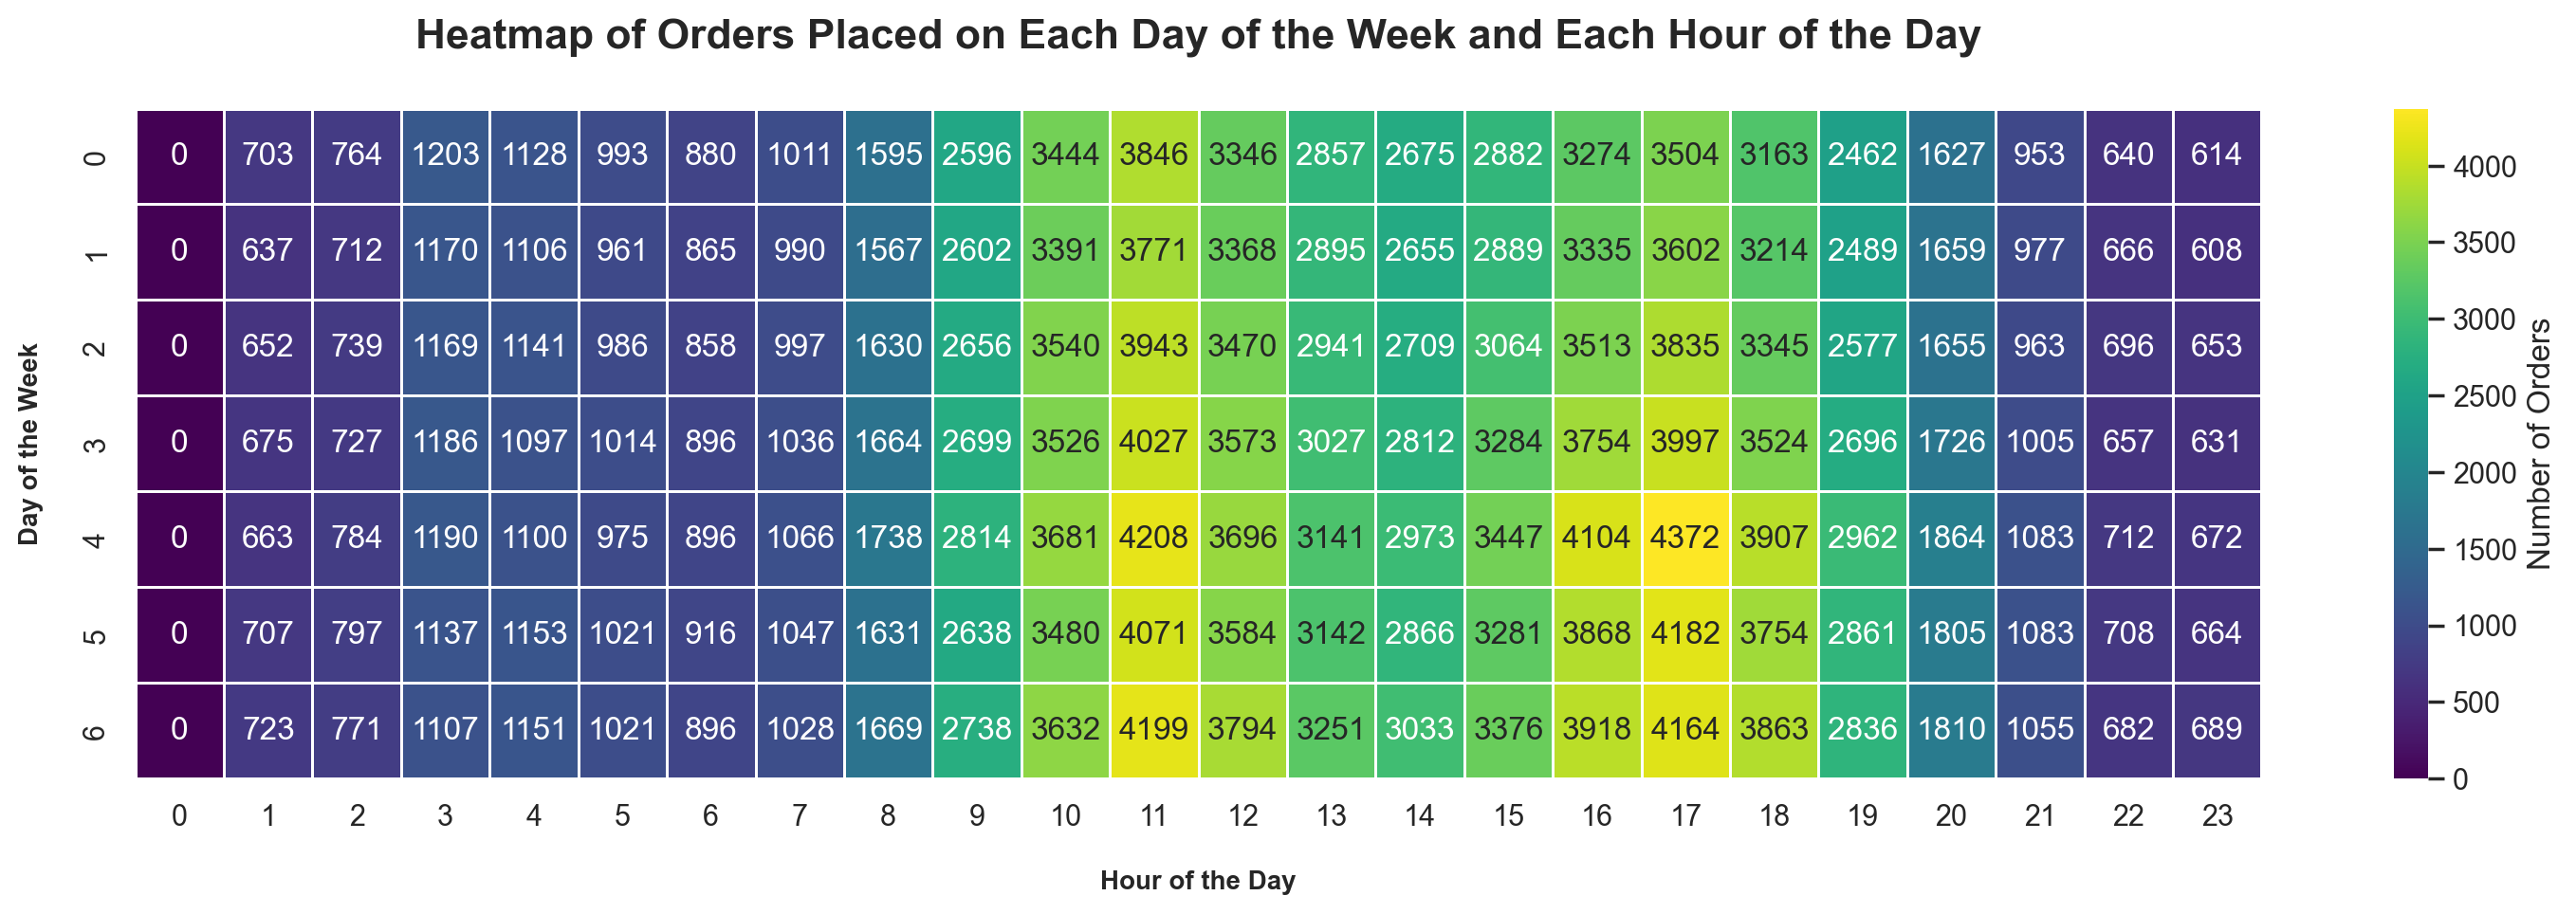

In [152]:
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

# Heatmap of the number of orders placed on each day of the week (DOW_0 to DOW_6) and each hour of the day (HR_0 to HR_23)
plt.figure(figsize=(15, 5))

# Change the xticks and yticks to be more readable
DOW_HR.columns = [f'{i}' for i in range(24)]
DOW_HR.index = [f'{i}' for i in range(7)]

sns.heatmap(DOW_HR, cmap='viridis', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Number of Orders'})
plt.title('Heatmap of Orders Placed on Each Day of the Week and Each Hour of the Day\n', fontweight='bold', fontsize=16)
plt.xlabel('\nHour of the Day', fontweight='bold', fontsize=10)
plt.ylabel('Day of the Week\n', fontweight='bold', fontsize=10)
plt.tight_layout()
plt.show()